# Abstract
Abtract paragraph here.


# Explore

Before we start exploring the data, we need to load in the Palmer's Penguins Dataset and take a look at the data we are given.

In [103]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


Now, we need to clean this data. First, we can see that there are some missing values. In this class, we haven't learned how to impude the missing values yet, so I will just get rid of the rows that have N/A values. Then, I will use the provided code to "one-hot ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍encode" the categorical features. These categorical columns should now be True/False rather than Yes/No.

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)
X_train.head()


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True


Now, I am going to merge the our target column with our features into a new dataset so that I can create visualizations easier.

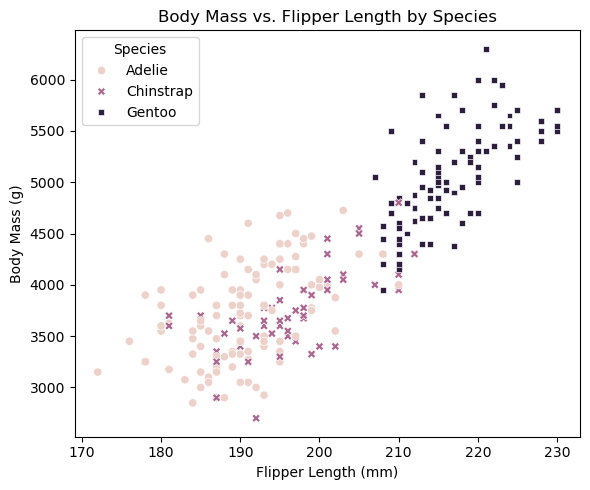

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = X_train.copy()
df["Species"] = y_train.flatten().astype(int)


fig, ax = plt.subplots(figsize=(6, 5))
sns.scatterplot(data=df, x="Flipper Length (mm)", y="Body Mass (g)", hue="Species", style="Species", ax=ax)
ax.set(title="Body Mass vs. Flipper Length by Species", xlabel="Flipper Length (mm)", ylabel="Body Mass (g)")
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Adelie", "Chinstrap", "Gentoo"], title="Species")
plt.tight_layout()
plt.show()

This scatterplot shows the relationship between Flipper Length (mm) and Body Mass (g) by the three penguin species: Adelie, Chinstrap, and Gentoo. My first takeaway from this plot is that while Gentoo penguins (represented by squares) have significantly higher higher body mass and longer flipper lengths than the other two species. Additionally, there is notable overlap between Adelie and Chinstrap penguins (represented by circles and X's) in the middle of the graph. For a classification problem, this is a little alarming for me because this overlap suggests that Flipper Length and Body Mass alone won't be able to reliably distinguish between Adelie and Chinstrap species. I may need to look for a different quantatative relationship to get to 100% accuracy. 

(['Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 np.float64(0.9844645550527904))

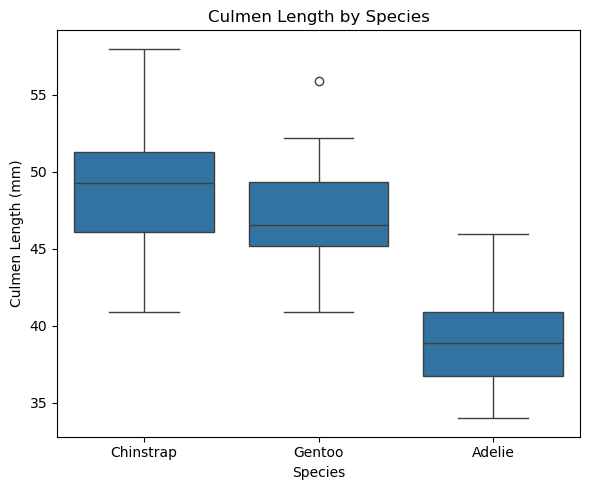

In [156]:
# Boxplot: Flipper Length Distribution (with hue)
map = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}

# Replace species numbers with names
df["Species"] = df["Species"].map(map)
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=df, x="Species", y="Culmen Length (mm)", ax=ax)
ax.set(title="Culmen Length by Species", xlabel="Species", ylabel="Culmen Length (mm)")
plt.tight_layout()
plt.show()

This boxplot illustrates the distribution of culmen length (mm) across the three penguin species. One observation is that Adelie penguins have the shortest culmen length by far. They have a median significantly lower than both Chinstrap and Gentoo penguins. Chinstrap penguins have the longest culmen length on average, with a higher IQR. Gentoo penguins tend to fall between the two but exhibit a slightly more compact distribution. This visualization reinforces the idea that culmen length could be a useful feature for distinguishing Adelie penguins from the other two species, but there may be some overlap between Chinstrap and Gentoo, so I'll have to address this when I am searching for my 3 features.

In [154]:
# Create a new 'Sex' column based on one-hot encoding
df["Sex"] = df["Sex_MALE"].map({True: "Male", False: "Female"})

# Group by Species and Sex, then calculate summary stats
summary_table = df.groupby(["Species", "Sex"]).aggregate({
    "Culmen Length (mm)": ["mean", "std"],
    "Culmen Depth (mm)": ["mean", "std"],
    "Flipper Length (mm)": ["mean", "std"],
    "Body Mass (g)": ["mean", "std"]
})

summary_table


Culmen Length (mm)           Culmen Depth (mm)            \
                             mean       std              mean       std   
Species Sex                                                               
0       Female          37.355769  1.896686         17.644231  0.928928   
        Male            40.451786  2.449044         19.064286  1.048536   
1       Female          46.722581  3.169933         17.612903  0.801558   
        Male            51.312000  1.633840         19.256000  0.779466   
2       Female          45.455102  1.971787         14.210204  0.536674   
        Male            49.046512  2.303760         15.741860  0.793495   

               Flipper Length (mm)           Body Mass (g)              
                              mean       std          mean         std  
Species Sex                                                             
0       Female          188.038462  5.423122   3353.365385  264.576467  
        Male            192.839286  6.893414   4066.071429  320.703367  
1       Female          192.064516  5.898788   3523.387097  294.953067  
        Male            200.480000  6.325346   4008.000000  375.951570  
2       Female          212.836735  3.466187   4684.693878  297.463948  
        Male            221.186047  5.279141   5481.976744  302.830181

This table highlights consistent differences between male and female penguins across all three species, suggesting that sex could be a valuable feature for species classification. I noticed that male penguins tend to have larger body mass, culmen length, and flipper length compared to females within the same species. These differences are especially pronounced in Body Mass (g) and Flipper Length (mm), where males exhibit significantly higher mean values than females. Since the magnitude of these differences varies by species—for example, Gentoo males are much heavier than Chinstrap or Adelie. So maybe, sex in combination with other quantitative features, can help differentiate species. Given that some species, like Adelie and Chinstrap, show overlap in other features (like in the first graph), incorporating sex into the model may improve classification accuracy by providing an additional distinguishing factor.

# Model

Now that I've done a little exploring of the data, it is time to determine which features will be predict the penguins in the "test" dataset. At a high level, I will iterate through every combination of 1 qualitative variable and 2 quantitative variables and use cross validation to determine which combination performs best within the training data.

In [ ]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


qualitative_features = ["Island_Biscoe", "Island_Dream", "Island_Torgersen", "Clutch Completion_No", "Clutch Completion_Yes", "Sex_FEMALE", "Sex_MALE"]
quantitative_features = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]


best_features = None
best_score = 0

# Try combinations of 1 qualitative + 2 quantitative features
for qual in qualitative_features:
    for quant_combo in combinations(quantitative_features, 2):
        selected_features = [qual] + list(quant_combo)

        # Train a Random Forest (instead of Decision Tree) with optimized hyperparameters
        RF = RandomForestClassifier(random_state=7)
        scores = cross_val_score(RF, X_train[selected_features], y_train, cv=5)

        # Compute mean accuracy
        mean_score = np.mean(scores)

        # Track the best feature combination
        if mean_score > best_score:
            best_score = mean_score
            best_features = selected_features

# Output the best feature set and corresponding accuracy
best_features, best_score


(['Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 np.float64(0.9844645550527904))

In this block, I am trying all combnations of 1 qualitative and 2 quantiative features. For each combo, I am creating a Random Forest object (I chose lucky number 7 for reproducability) and using the cross_val_score function to see how the model does with these features. I am familiar with Random Forests for STAT0218 but I don't remember how the hyperparameters work (like max_depth) so I didn't tune those. I then took the vector of 5 cross-validation scores to gauge how each combination performed. I then updated the best score and selected features if they were the best so far. I found that the best three performing features were ['Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)'] which had an average accuracy of about 98% when I cross-validated. This is pretty in line with some of my findings from the explore phase. 

# Testing

In [164]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)','Sex_MALE']

RF = RandomForestClassifier(random_state=7)
RF.fit(X_test[cols], y_test)
RF.score(X_test[cols], y_test)


1.0

Here, I fit a random forest using the features that I found above with the test data and was able to get 100% accuracy! Now, let's take a look at the desision boundaries.

In [131]:
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
import numpy as np

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()


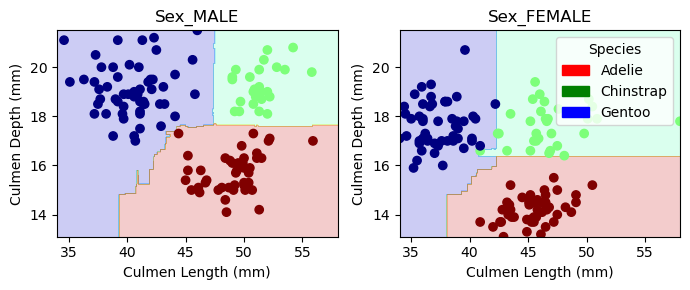

In [166]:
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)','Sex_MALE', "Sex_FEMALE"]
RF = RandomForestClassifier(random_state=7)
RF.fit(X_train[cols], y_train)

plot_regions(RF, X_train[cols], y_train)

I used the plot_regions() function that we were given to show how the training data looks with a Random Forest Model and the feaures Culmen Length, Culmen Depth, and Sex. The boundaries for a Random Forest are a little funky but it we can see how effective this model and these features are for classifying the penguins. The blue (Gentoo), red (Adelie), and green (Chinstrap) regions show how the model segments the feature space. I notice that Gentoo are in the upper left showing that culmen depth might be the primary classfying in distinguishing. For Chinstrap and Adelie there is slightly more overlap. Some Chinstrap points appear in the red region. This suggests that while culmen depth helps differentiate Gentoo penguins, it may not be as reliable in distinguishing Adelie and Chinstrap.

The decision boundaries for males and females have the same general shape, but are different. This indicates that sex influences the classification. The boundaries for Adelie and Chinstrap penguins appear more distinct in females than in males, which may imply that culmen depth differences between these two species are more pronounced in female penguins. This reinforces why "Sex_MALE" was selected as an important feature—it helps refine the classification process and improves separation between species.

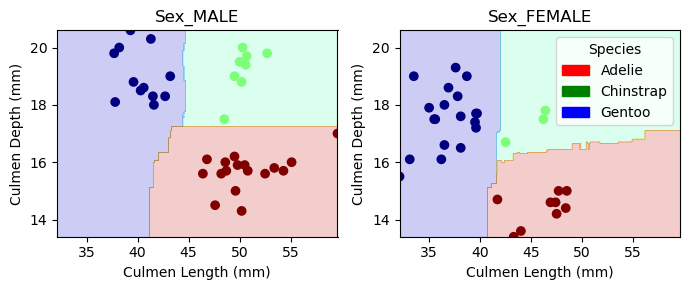

In [167]:
RF = RandomForestClassifier(random_state=7)
RF.fit(X_test[cols], y_test)
plot_regions(RF, X_test[cols], y_test)

I used the plot_regions() function that we were given to show how the testing data looks with a Random Forest Model and the feaures Culmen Length, Culmen Depth, and Sex. This model achieved 100% accuracy on the test data, meaning that every penguin was correctly classified. The clear separation of species in the decision regions supports why this model was so effective. 









In [169]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
y_test_pred = RF.predict(X_test[cols])

# Compute confusion matrix
C = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix
C


array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]])

The diagonal entires are the ones my model got correctly. This is 100% accurate.

# Discussion